In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification/ecommerce_customer_churn_dataset.csv", encoding="latin1")

In [ ]:


# Show first rows
print(df.head())

# Dataset shape
print("Dataset Shape:", df.shape)

# Column info
print(df.info())

    Age  Gender Country        City  Membership_Years  Login_Frequency  \
0  43.0    Male  France   Marseille               2.9             14.0   
1  36.0    Male      UK  Manchester               1.6             15.0   
2  45.0  Female  Canada   Vancouver               2.9             10.0   
3  56.0  Female     USA    New York               2.6             10.0   
4  35.0    Male   India       Delhi               3.1             29.0   

   Session_Duration_Avg  Pages_Per_Session  Cart_Abandonment_Rate  \
0                  27.4                6.0                   50.6   
1                  42.7               10.3                   37.7   
2                  24.8                1.6                   70.9   
3                  38.4               14.8                   41.7   
4                  51.4                NaN                   19.1   

   Wishlist_Items  ...  Email_Open_Rate  Customer_Service_Calls  \
0             3.0  ...             17.9                     9.0   
1     

In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64


In [ ]:
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Fill numeric missing values with mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical missing values with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled successfully!")


Missing values handled successfully!


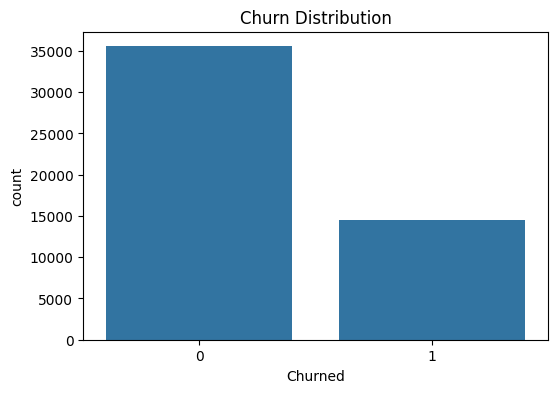

Churned
0    0.711
1    0.289
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churned", data=df)
plt.title("Churn Distribution")
plt.show()

print(df["Churned"].value_counts(normalize=True))


In [ ]:
print(df.describe())


                Age  Membership_Years  Login_Frequency  Session_Duration_Avg  \
count  50000.000000      50000.000000     50000.000000          50000.000000   
mean      37.802968          2.984009        11.624660             27.660754   
std       11.535608          2.059105         7.810657             10.494997   
min        5.000000          0.100000         0.000000              1.000000   
25%       30.000000          1.400000         6.000000             20.200000   
50%       37.802968          2.500000        11.000000             27.660754   
75%       45.000000          4.000000        17.000000             34.000000   
max      200.000000         10.000000        46.000000             75.600000   

       Pages_Per_Session  Cart_Abandonment_Rate  Wishlist_Items  \
count       50000.000000           50000.000000    50000.000000   
mean            8.737811              57.079973        4.298391   
std             3.663118              16.282723        3.059502   
min        

In [ ]:
categorical_cols = ["Gender", "Country", "City", "Signup_Quarter"]

for col in categorical_cols:
    print("\n", col)
    print(df[col].value_counts())



 Gender
Gender
Female    25116
Male      23947
Other       937
Name: count, dtype: int64

 Country
Country
USA          17384
UK            7534
Canada        6023
Germany       4925
Australia     4061
France        4013
India         3512
Japan         2548
Name: count, dtype: int64

 City
City
Houston        3549
Phoenix        3490
New York       3477
Chicago        3475
Los Angeles    3393
Manchester     1576
Birmingham     1535
Leeds          1529
London         1458
Glasgow        1436
Montreal       1247
Toronto        1209
Calgary        1204
Ottawa         1182
Vancouver      1181
Cologne        1033
Hamburg        1026
Berlin         1013
Munich          960
Frankfurt       893
Lyon            830
Sydney          828
Perth           817
Adelaide        817
Toulouse        815
Melbourne       805
Nice            799
Brisbane        794
Marseille       793
Paris           776
Chennai         736
Bangalore       698
Mumbai          694
Delhi           693
Hyderabad       691
To

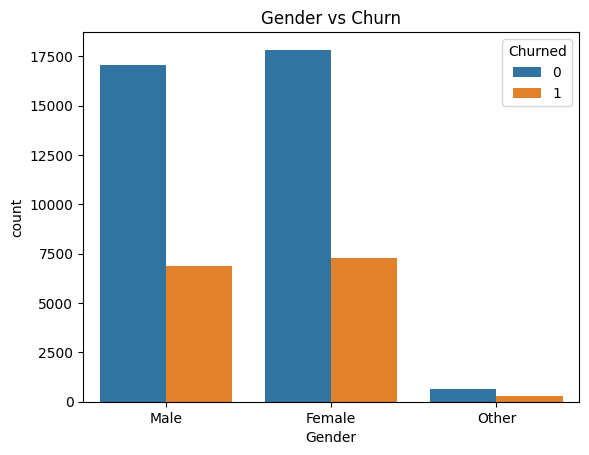

In [ ]:
sns.countplot(x="Gender", hue="Churned", data=df)
plt.title("Gender vs Churn")
plt.show()


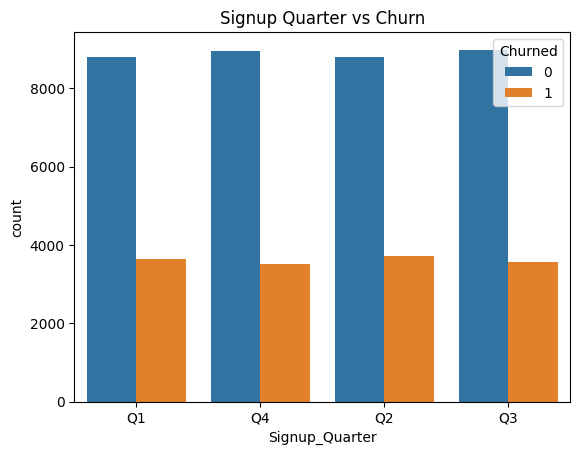

In [ ]:
sns.countplot(x="Signup_Quarter", hue="Churned", data=df)
plt.title("Signup Quarter vs Churn")
plt.show()


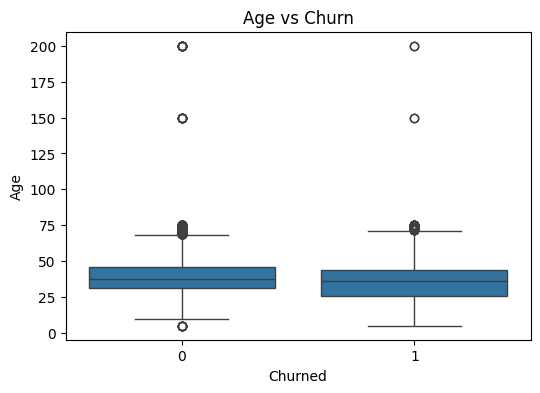

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churned", y="Age", data=df)
plt.title("Age vs Churn")
plt.show()


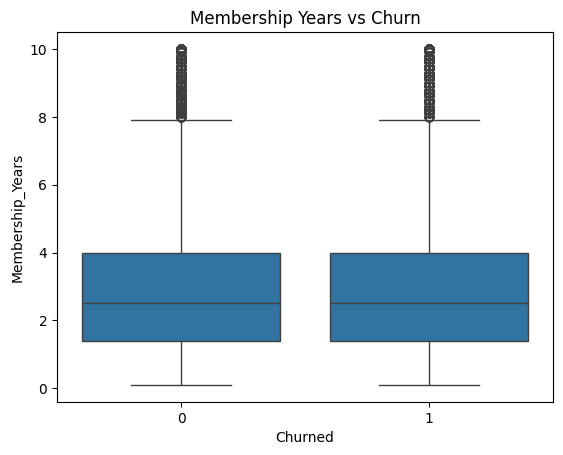

In [ ]:
sns.boxplot(x="Churned", y="Membership_Years", data=df)
plt.title("Membership Years vs Churn")
plt.show()


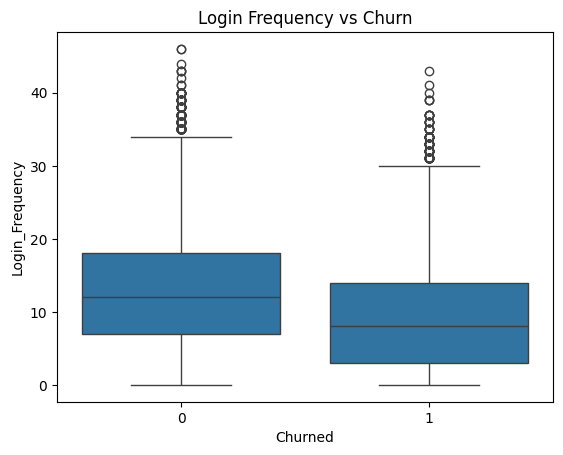

In [ ]:
sns.boxplot(x="Churned", y="Login_Frequency", data=df)
plt.title("Login Frequency vs Churn")
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])



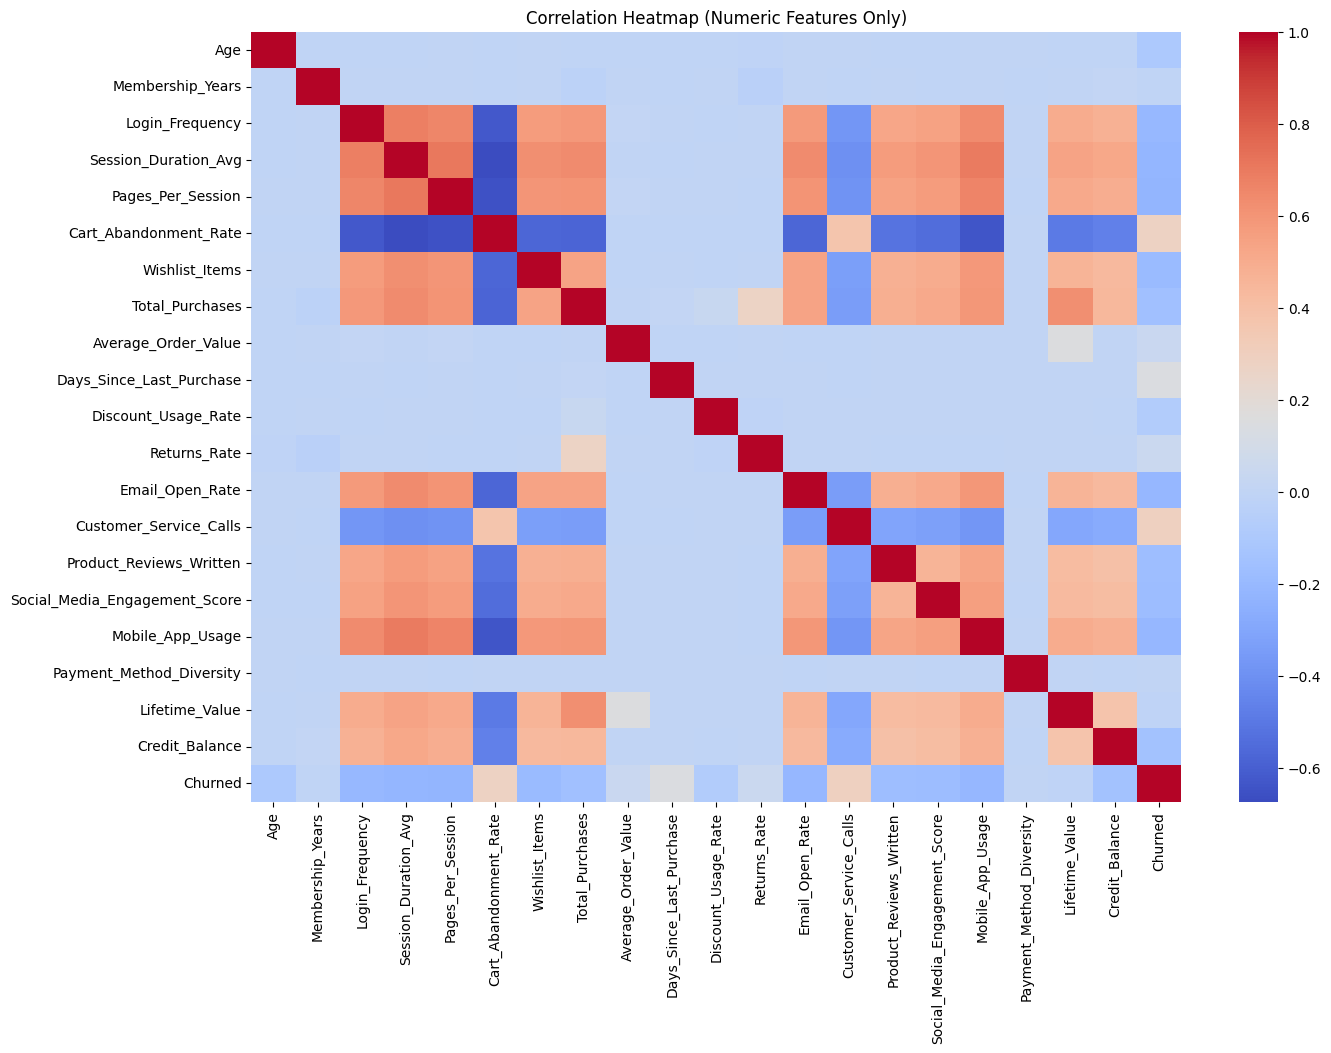

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

corr_target = numeric_df.corr()["Churned"].sort_values(ascending=False)

print("Top Positive Correlations:\n", corr_target.head(10))
print("\nTop Negative Correlations:\n", corr_target.tail(10))


Top Positive Correlations:
 Churned                     1.000000
Customer_Service_Calls      0.290545
Cart_Abandonment_Rate       0.277963
Days_Since_Last_Purchase    0.148633
Returns_Rate                0.051647
Average_Order_Value         0.042288
Payment_Method_Diversity    0.004412
Membership_Years           -0.000623
Lifetime_Value             -0.010684
Discount_Usage_Rate        -0.074523
Name: Churned, dtype: float64

Top Negative Correlations:
 Credit_Balance                  -0.147935
Total_Purchases                 -0.160029
Product_Reviews_Written         -0.174614
Social_Media_Engagement_Score   -0.179719
Wishlist_Items                  -0.189627
Login_Frequency                 -0.204379
Mobile_App_Usage                -0.211477
Email_Open_Rate                 -0.215104
Session_Duration_Avg            -0.218055
Pages_Per_Session               -0.224880
Name: Churned, dtype: float64


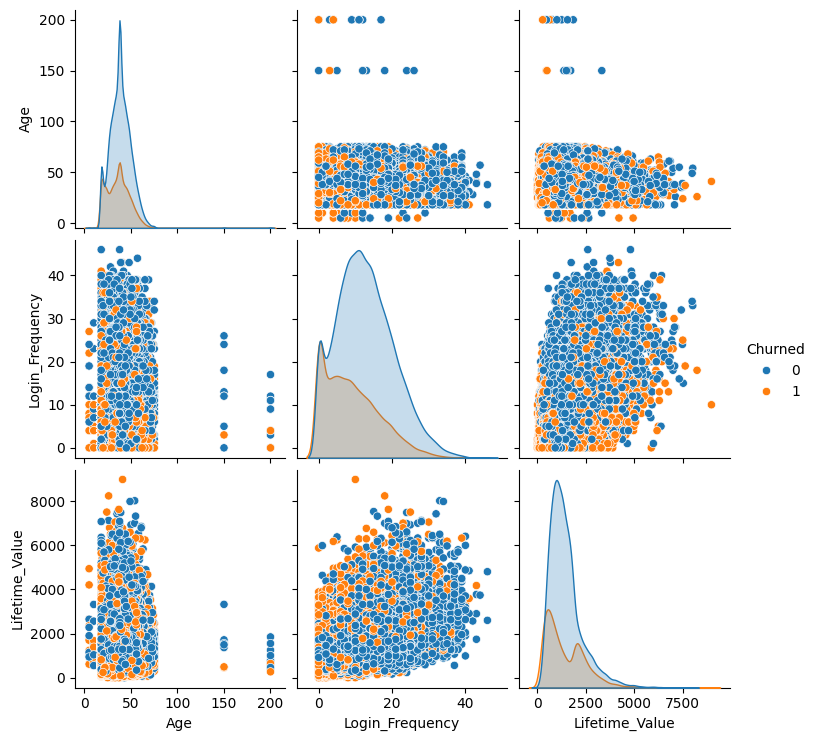

In [ ]:
sns.pairplot(df[["Age", "Login_Frequency", "Lifetime_Value", "Churned"]],
             hue="Churned")
plt.show()


Possible churn indicators:
Customers with low login frequency churn more

High cart abandonment rate increases churn

More customer service calls = unhappy customers

Higher days since last purchase = churn risk

Low lifetime value users churn more

In [ ]:
X = df.drop(columns=['Churned'])   # Features
y = df['Churned']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split # Import the function




In [ ]:
# Normalize features manually using Min-Max Scaling

def min_max_scaling(X):

    # Step 1: Convert categorical columns into numerical form using One-Hot Encoding
    X = pd.get_dummies(
        X,
        columns=['Gender', 'Country', 'City', 'Signup_Quarter'],
        drop_first=True
    )

    # Step 2: Convert boolean columns (if any) into integer values (0 or 1)
    for col in X.select_dtypes(include=['bool']).columns:
        X[col] = X[col].astype(int)

    # Step 3: Apply Min-Max Normalization
    X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

    return X_scaled


# Apply scaling on feature dataset
X_scaled = min_max_scaling(X)


In [ ]:
# Convert target labels into One-Hot Encoding format
# This is useful when training Neural Networks

def one_hot_encode(y, num_classes):

    # Step 1: Convert Pandas Series into NumPy array (if needed)
    if isinstance(y, pd.Series):
        y = y.to_numpy()

    # Step 2: Identify unique classes (for churn: [0, 1])
    unique_classes = np.unique(y)

    # Step 3: Create mapping from class label → index
    class_to_index = {cls: i for i, cls in enumerate(unique_classes)}

    # Step 4: Convert original labels into numeric indices
    y_numeric = np.array([class_to_index[val] for val in y])

    # Step 5: Create empty one-hot encoded matrix
    encoded = np.zeros((y.shape[0], num_classes))

    # Step 6: Fill one-hot values
    for i, val in enumerate(y_numeric):
        encoded[i, int(val)] = 1

    return encoded


In [ ]:
# Since the target variable 'Churned' has only 2 unique classes:
# 0 = Not Churned
# 1 = Churned

y_encoded_onehot = one_hot_encode(y, num_classes=2)

In [ ]:
# Manual Train-Test Split without using sklearn

def train_test_split_manual(X, y, test_size=0.2):

    # Step 1: Generate random indices for shuffling
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    # Step 2: Find split point based on test size
    split_idx = int(X.shape[0] * (1 - test_size))

    # Step 3: Split the dataset into training and testing sets
    X_train = X.iloc[indices[:split_idx]]
    X_test  = X.iloc[indices[split_idx:]]

    y_train = y[indices[:split_idx]]
    y_test  = y[indices[split_idx:]]

    return X_train, X_test, y_train, y_test


# Apply manual train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split_manual(
    X_scaled, y_encoded_onehot, test_size=0.2
)


In [ ]:
import numpy as np

# -------------------------------
# Softmax Activation Function
# -------------------------------
def softmax(z):
    """
    Computes softmax probabilities for each class
    z: numpy array of shape (num_samples, num_classes)
    """
    # Stability fix: subtract max from each row
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


# -------------------------------
# Categorical Cross-Entropy Loss
# -------------------------------
def categorical_log_loss(y_true, y_pred):
    """
    Computes the categorical cross-entropy loss
    y_true: one-hot encoded true labels
    y_pred: predicted probabilities from softmax
    """
    # Add epsilon to avoid log(0)
    return -np.sum(y_true * np.log(y_pred + 1e-15)) / y_true.shape[0]


# -------------------------------
# Softmax Regression Model
# -------------------------------
class SoftmaxRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        """
        Trains the model using gradient descent
        X: feature matrix (num_samples x num_features)
        y: one-hot encoded target matrix (num_samples x num_classes)
        """
        num_samples, num_features = X.shape
        num_classes = y.shape[1]

        # Initialize weights and bias
        self.W = np.random.randn(num_features, num_classes) * 0.01
        self.b = np.zeros((1, num_classes))

        # Gradient Descent Loop
        for _ in range(self.epochs):
            logits = np.dot(X, self.W) + self.b   # Linear combination
            y_pred = softmax(logits)              # Softmax activation

            # Compute gradients
            grad_W = np.dot(X.T, (y_pred - y)) / num_samples
            grad_b = np.sum(y_pred - y, axis=0, keepdims=True) / num_samples

            # Update weights and bias
            self.W -= self.learning_rate * grad_W
            self.b -= self.learning_rate * grad_b

    def predict(self, X):
        """
        Predicts class labels for input samples
        Returns: array of class indices
        """
        logits = np.dot(X, self.W) + self.b
        y_pred = softmax(logits)
        return np.argmax(y_pred, axis=1)


In [ ]:
# Instantiate the Softmax Regression model
model = SoftmaxRegression(learning_rate=0.1, epochs=1000)

# Train the model on training data
model.fit(X_train.to_numpy(), y_train)  # X_train is scaled, y_train is one-hot

# Predict on test set
y_pred_classes = model.predict(X_test.to_numpy())

# Convert one-hot test labels to class indices for evaluation
y_test_classes = np.argmax(y_test, axis=1)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Softmax Regression Performance on Churn Test Set:")
print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Precision:", precision_score(y_test_classes, y_pred_classes))
print("Recall:", recall_score(y_test_classes, y_pred_classes))
print("F1 Score:", f1_score(y_test_classes, y_pred_classes))


Softmax Regression Performance on Churn Test Set:
Accuracy: 0.7476
Precision: 0.8304552590266876
Recall: 0.17962648556876062
F1 Score: 0.2953657174762702


In [ ]:
# -------------------------------
# Train the Softmax Regression Model
# -------------------------------

# Instantiate the model with learning rate and epochs
model = SoftmaxRegression(learning_rate=0.01, epochs=1000)

# Fit the model on training data
# Note: X_train is scaled features, y_train is one-hot encoded labels
model.fit(X_train.to_numpy(), y_train)

# Predict on training and testing sets
y_pred_train = model.predict(X_train.to_numpy())
y_pred_test  = model.predict(X_test.to_numpy())


# -------------------------------
# Manual Accuracy Function
# -------------------------------
def accuracy(y_true, y_pred):
    """
    Computes the classification accuracy
    y_true: array of true class indices
    y_pred: array of predicted class indices
    """
    return np.mean(y_true == y_pred)


# Convert one-hot labels to class indices
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes  = np.argmax(y_test, axis=1)


# Compute train and test accuracy
train_acc = accuracy(y_train_classes, y_pred_train)
test_acc  = accuracy(y_test_classes, y_pred_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")


Training Accuracy: 0.7124
Testing Accuracy:  0.7055


In [ ]:
# -------------------------------
# Manual Precision, Recall, and F1-Score Function
# -------------------------------
def precision_recall_f1(y_true, y_pred, num_classes=2):
    """
    Computes precision, recall, and F1-score for each class manually.

    Parameters:
    - y_true: array of true class indices
    - y_pred: array of predicted class indices
    - num_classes: number of unique classes

    Returns:
    - precision: list of precision values for each class
    - recall: list of recall values for each class
    - f1: list of F1-scores for each class
    """
    precision, recall, f1 = [], [], []

    for c in range(num_classes):
        # True Positives: predicted c and actually c
        tp = np.sum((y_pred == c) & (y_true == c))

        # False Positives: predicted c but not actually c
        fp = np.sum((y_pred == c) & (y_true != c))

        # False Negatives: not predicted c but actually c
        fn = np.sum((y_pred != c) & (y_true == c))

        # Compute metrics safely (avoid division by zero)
        prec = tp / (tp + fp + 1e-15)
        rec  = tp / (tp + fn + 1e-15)
        f1_s = 2 * (prec * rec) / (prec + rec + 1e-15)

        precision.append(prec)
        recall.append(rec)
        f1.append(f1_s)

    return precision, recall, f1


In [ ]:
# Number of classes in churn: 2 (0 = Not Churned, 1 = Churned)
num_classes = 2

# Compute metrics on test data
precision, recall, f1_scores = precision_recall_f1(y_test_classes, y_pred_test, num_classes)

# Print results
for c in range(num_classes):
    print(f"Class {c} -> Precision: {precision[c]:.4f}, Recall: {recall[c]:.4f}, F1-Score: {f1_scores[c]:.4f}")


Class 0 -> Precision: 0.7055, Recall: 1.0000, F1-Score: 0.8273
Class 1 -> Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000


In [ ]:
# -------------------------------
# Manual Confusion Matrix Function
# -------------------------------
def confusion_matrix_manual(y_true, y_pred, num_classes=2):
    """
    Computes confusion matrix manually.

    Parameters:
    - y_true: array of true class indices
    - y_pred: array of predicted class indices
    - num_classes: number of unique classes

    Returns:
    - cm: confusion matrix (num_classes x num_classes)
      Rows = Actual class, Columns = Predicted class
    """
    # Initialize confusion matrix with zeros
    cm = np.zeros((num_classes, num_classes), dtype=int)

    # Fill the matrix
    for i in range(len(y_true)):
        cm[int(y_true[i]), int(y_pred[i])] += 1

    return cm


In [ ]:
# Compute confusion matrix for test set
cm_test = confusion_matrix_manual(y_test_classes, y_pred_test, num_classes=2)

print("Confusion Matrix (Test Set):")
print(cm_test)


Confusion Matrix (Test Set):
[[7055    0]
 [2945    0]]


In [ ]:
# -------------------------------
# Model Evaluation
# -------------------------------

# Convert one-hot encoded labels to class indices
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes  = np.argmax(y_test, axis=1)

# 1️⃣ Compute Accuracy
train_acc = accuracy(y_train_classes, y_pred_train)
test_acc  = accuracy(y_test_classes, y_pred_test)

# 2️⃣ Compute Precision, Recall, F1-Score
num_classes = len(np.unique(y))  # For churn dataset: 2 classes (0,1)

precision_train, recall_train, f1_train = precision_recall_f1(y_train_classes, y_pred_train, num_classes)
precision_test, recall_test, f1_test    = precision_recall_f1(y_test_classes, y_pred_test, num_classes)

# 3️⃣ Compute Confusion Matrix
conf_matrix_train = confusion_matrix_manual(y_train_classes, y_pred_train, num_classes)
conf_matrix_test  = confusion_matrix_manual(y_test_classes, y_pred_test, num_classes)


# -------------------------------
# Print Evaluation Results
# -------------------------------

print("=== Training Set Metrics ===")
print(f"Accuracy: {train_acc:.4f}")
for c in range(num_classes):
    print(f"Class {c} -> Precision: {precision_train[c]:.4f}, Recall: {recall_train[c]:.4f}, F1-Score: {f1_train[c]:.4f}")
print("Confusion Matrix:\n", conf_matrix_train)

print("\n=== Testing Set Metrics ===")
print(f"Accuracy: {test_acc:.4f}")
for c in range(num_classes):
    print(f"Class {c} -> Precision: {precision_test[c]:.4f}, Recall: {recall_test[c]:.4f}, F1-Score: {f1_test[c]:.4f}")
print("Confusion Matrix:\n", conf_matrix_test)


=== Training Set Metrics ===
Accuracy: 0.7124
Class 0 -> Precision: 0.7124, Recall: 1.0000, F1-Score: 0.8320
Class 1 -> Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Confusion Matrix:
 [[28495     0]
 [11505     0]]

=== Testing Set Metrics ===
Accuracy: 0.7055
Class 0 -> Precision: 0.7055, Recall: 1.0000, F1-Score: 0.8273
Class 1 -> Precision: 0.0000, Recall: 0.0000, F1-Score: 0.0000
Confusion Matrix:
 [[7055    0]
 [2945    0]]


In [ ]:
print("Train Set Evaluation:")
print("Accuracy:", train_acc)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)
print("Confusion Matrix:")
print(conf_matrix_train)


Train Set Evaluation:
Accuracy: 0.712375
Precision: [np.float64(0.712375), np.float64(0.0)]
Recall: [np.float64(1.0), np.float64(0.0)]
F1-score: [np.float64(0.8320315351485504), np.float64(0.0)]
Confusion Matrix:
[[28495     0]
 [11505     0]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded_onehot, test_size=0.2, random_state=42)

# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [ ]:
# Evaluate Decision Tree Model
dt_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(dt_predictions, axis=1))  # Convert predictions to class labels
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(dt_predictions, axis=1), average=None) # Convert predictions to class labels
dt_cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(dt_predictions, axis=1)) # Convert predictions to class labels

In [ ]:
print("\nDecision Tree Evaluation:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-score: {dt_f1}")
print("Confusion Matrix:")
print(dt_cm)


Decision Tree Evaluation:
Accuracy: 0.8459
Precision: [0.8959898  0.72579001]
Recall: [0.88681627 0.74425087]
F1-score: [0.89137943 0.73490452]
Confusion Matrix:
[[6323  807]
 [ 734 2136]]


In [ ]:
# Train Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded_onehot, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [ ]:
# Evaluate Random Forest Model
rf_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(rf_predictions, axis=1))  # Convert to class labels
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(rf_predictions, axis=1), average=None)  # Convert to class labels
rf_cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(rf_predictions, axis=1))  # Convert to class labels

In [ ]:
print("\nRandom Forest Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")
print("Confusion Matrix:")
print(rf_cm)



Random Forest Evaluation:
Accuracy: 0.9131
Precision: [0.91012708 0.92268695]
Recall: [0.9743338  0.76097561]
F1-score: [0.94113663 0.8340653 ]
Confusion Matrix:
[[6947  183]
 [ 686 2184]]


In [ ]:
# Hyperparameter Optimization for Decision Tree
dt_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# -------------------------------
# Hyperparameter Grid for Random Forest
# -------------------------------
rf_param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees
    'max_depth': [3, 5, 10, None],          # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]           # Minimum samples required at a leaf node
}

# -------------------------------
# Initialize GridSearchCV
# -------------------------------
# Note: For RandomForest, y should be class indices (not one-hot)
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes  = np.argmax(y_test, axis=1)

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# -------------------------------
# Fit the GridSearch to Training Data
# -------------------------------
rf_grid_search.fit(X_train, y_train_classes)

# -------------------------------
# Best Hyperparameters
# -------------------------------
print("Best Random Forest Parameters:", rf_grid_search.best_params_)


In [ ]:
# Decision Tree Feature Selection
# Store original column names
original_columns = X_train.columns  # Get columns from the preprocessed data

# Feature Selection using Recursive Feature Elimination (RFE) for Decision Tree
rfe_dt = RFE(estimator=DecisionTreeClassifier(random_state=42), n_features_to_select=5)
rfe_dt.fit(X_train, y_train)
selected_features_rfe_dt = original_columns[rfe_dt.support_]  # Use original column names
print("Top Features using RFE (Decision Tree):", list(selected_features_rfe_dt))

# Feature Selection using Recursive Feature Elimination (RFE) for Random Forest
rfe_rf = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe_rf.fit(X_train, y_train)
selected_features_rfe_rf = original_columns[rfe_rf.support_]  # Use original column names
print("Top Features using RFE (Random Forest):", list(selected_features_rfe_rf))

In [ ]:
# Define selected features from RFE
selected_features_original = ['Age', 'Na_to_K', 'BP', 'Cholesterol']
X_selected = data[selected_features_original].copy()  # Copy to avoid modifying the original DataFrame

# One-Hot Encoding for Categorical Features (BP and Cholesterol)
X_selected = pd.get_dummies(X_selected, columns=['BP', 'Cholesterol'], drop_first=True)

# Split into train and test sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

# Use best hyperparameters from GridSearchCV
best_rf_params = rf_grid_search.best_params_

# Build and train the final Random Forest model with best hyperparameters
final_model = RandomForestClassifier(**best_rf_params, random_state=42)
final_model.fit(X_train_selected, y_train)

# Make predictions
final_predictions = final_model.predict(X_test_selected)

# Evaluate model
final_accuracy = accuracy_score(y_test, final_predictions)
final_precision, final_recall, final_f1, _ = precision_recall_fscore_support(y_test, final_predictions, average='macro')  # Macro for multiclass
final_cm = confusion_matrix(y_test, final_predictions)

# Print evaluation metrics
print("\nFinal Model Performance (Optimized Random Forest for Multiclass Classification):")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision (Macro-Averaged): {final_precision:.4f}")
print(f"Recall (Macro-Averaged): {final_recall:.4f}")
print(f"F1-score (Macro-Averaged): {final_f1:.4f}")
print(f"Confusion Matrix:\n{final_cm}")